In [1]:
import os
import re
import sys
import json
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
from dna_features_viewer import GraphicFeature, GraphicRecord
sys.path.append(r'/davidb/yatirsolan/scripts/python/bio_utilities')
sys.path.append(r'/davidb/yatirsolan/thesis_work/figures/general')
import phylogenetics
import visual_utils
import gff_parser
import databases

Dictionary of the contig and its gff file path

In [2]:
working_directory = r'/davidb/yatirsolan/thesis_work/figures/T4SS_operons_representatives'
paths_file_json = r'/davidb/yatirsolan/thesis_work/figures/general/final_paths.json'
os.chdir(working_directory)
T4SS_paths = json.load(open(paths_file_json)).get('T4SS')
T4SS_paths

{'report': '/davidb/yatirsolan/secretion_systems/T4SS/T4SS.report',
 'all_together_summary': '/davidb/yatirsolan/secretion_systems/T4SS/T4SS_summary.tsv',
 'general_analyzer': '/davidb/yatirsolan/secretion_systems/T4SS/T4SS_gnrl_anlyz.tsv',
 'system_distribution': '/davidb/yatirsolan/data_presentation/family/T4SS/review_family_T4SS_systems_distribution.pkl',
 'possession_dataframe': '/davidb/yatirsolan/data_presentation/family/T4SS/review_family_T4SS_system_possession_mtdta.tsv',
 'T4SSA': '/davidb/yatirsolan/secretion_systems/T4SS/T4SSA_vs_Metagenomics/review_summary/T4SSA_summary.tsv',
 'T4SSB': '/davidb/yatirsolan/secretion_systems/T4SS/T4SSB_vs_Metagenomics/review_summary/T4SSB_summary.tsv'}

Declaring the group of intrest : 

In [27]:
actual_systems_df = pd.read_table(r'/davidb/yatirsolan/secretion_systems/T4SS/T4SSB_vs_Metagenomics/review_summary/T4SSB_min_core_prts.tsv')
gnrl_anlz_df = pd.read_table(r'/davidb/yatirsolan/secretion_systems/T4SS/T4SSB_vs_Metagenomics/review_summary/T4SSB_gnrl_anlyz.tsv')
sys_dstrb = pickle.load(open(T4SS_paths.get('system_distribution'),'rb'))
poss_df = pd.read_table(T4SS_paths.get('possession_dataframe'))
cntg_gff_path_dic = visual_utils.gff_paths(r'/davidb/yatirsolan/secretion_systems/T4SS/T4SSB_vs_Metagenomics/review_summary/T4SSB.report')
mtdta_dic = {k:v for k,v in pd.read_table(json.load(open(paths_file_json)).get('tree_metadata_family')).loc[:,['rnk_txn', 'phyla_class']].values}

poss_df['phyla_class'] = poss_df.rnk_txn.apply(lambda x: mtdta_dic.get(x))
poss_df = poss_df[poss_df.possession!='none']
poss_df.drop('possession', axis=1, inplace=True)
poss_df.sort_values(by=['system', 'phyla_class'], ascending=[True, True], inplace=True)
possession_dictionary = {tpe:{phy_cla:list(sub_sub_df.rnk_txn) for phy_cla, sub_sub_df in sub_df.groupby('phyla_class')} for tpe, sub_df in poss_df.groupby('system')}

dict_for_df = {'type':list(), 'phyla_class':list(), 'leaf':list(), 'contig':list()}

leaves_lst = [('Legionellaceae', 'Legionella_oakridgensis_ATCC_33761___DSM_21215|SAMN02641506|GCA_000512355.1|CP004006.1'), 
              ('Legionellaceae', 'Legionella_pneumophila_subsp._pneumophila_str._Philadelphia_1|SAMN02603156|GCA_000008485.1|AE017354.1'), 
              ('Coxiellaceae', 'Coxiella_burnetii|SAMN11578543|GCA_005280755.1|CP040059.1'), 
              ('Pseudomonadaceae', 'Pseudomonas_putida|SAMD00200259|GCA_009938035.1|AP022324.1'), 
              ('Pseudomonadaceae', 'Pseudomonas_monteilii|SAMN13494104|GCA_009905655.1|JAAAKY010000005.1'), 
              ('Pseudomonadaceae', 'Pseudomonas_parafulva_NBRC_16636___DSM_17004|SAMN02441530|GCA_000425765.1|AUEB01000012.1'), 
              ('Pseudomonadaceae', 'Pseudomonas_amygdali_pv._sesami|SAMN03976303|GCA_001401265.1|LJRG01000344.1'), 
              ('Piscirickettsiaceae', 'Piscirickettsia_salmonis|SAMN03068712|GCA_002556625.1|PDFD01000031.1')]

for leaf, contig in leaves_lst:
    dict_for_df.get('type').append('T4SSB')
    dict_for_df.get('phyla_class').append(mtdta_dic.get(leaf))
    dict_for_df.get('leaf').append(leaf)
    dict_for_df.get('contig').append(contig)

def arrange_species_name(species):
    species_lst = species.split()
    species_name = ' '.join(species_lst[:2:])
    return species_name

rpr_df = pd.DataFrame.from_dict(dict_for_df)
rpr_df.sort_values(by=['phyla_class'], ascending=[True], inplace=True)
rpr_df['GCA'] = rpr_df.contig.map(databases.gca_from_accession)
rpr_df['taxid'] = rpr_df.GCA.map(databases.gca_taxids_dic())
rpr_df['species'] = rpr_df.taxid.map(phylogenetics.taxid_to_name)
rpr_df['species'] = rpr_df.species.map(arrange_species_name)
rpr_df.reset_index(inplace=True, drop=True)
contigs_of_intrest = rpr_df.contig.to_list()
rpr_df

,type,phyla_class,leaf,contig,GCA,taxid,species
0,T4SSB,Gammaproteobacteria,Legionellaceae,Legionella_oakridgensis_ATCC_33761___DSM_21215...,GCA_000512355.1,1268635,Legionella oakridgensis
1,T4SSB,Gammaproteobacteria,Legionellaceae,Legionella_pneumophila_subsp._pneumophila_str....,GCA_000008485.1,272624,Legionella pneumophila
2,T4SSB,Gammaproteobacteria,Coxiellaceae,Coxiella_burnetii|SAMN11578543|GCA_005280755.1...,GCA_005280755.1,777,Coxiella burnetii
3,T4SSB,Gammaproteobacteria,Pseudomonadaceae,Pseudomonas_putida|SAMD00200259|GCA_009938035....,GCA_009938035.1,303,Pseudomonas putida
4,T4SSB,Gammaproteobacteria,Pseudomonadaceae,Pseudomonas_monteilii|SAMN13494104|GCA_0099056...,GCA_009905655.1,76759,Pseudomonas monteilii
5,T4SSB,Gammaproteobacteria,Pseudomonadaceae,Pseudomonas_parafulva_NBRC_16636___DSM_17004|S...,GCA_000425765.1,1215114,Pseudomonas parafulva
6,T4SSB,Gammaproteobacteria,Pseudomonadaceae,Pseudomonas_amygdali_pv._sesami|SAMN03976303|G...,GCA_001401265.1,86841,Pseudomonas amygdali
7,T4SSB,Gammaproteobacteria,Piscirickettsiaceae,Piscirickettsia_salmonis|SAMN03068712|GCA_0025...,GCA_002556625.1,1238,Piscirickettsia salmonis


Extracting all the orfs out of the general analyzer file

In [28]:
cntg_mtchs_dic, cntg_orfs_dic = visual_utils.contig_survey_general(contigs_of_intrest, gnrl_anlz_df)

In [29]:
box_colors_dic = {'T4SSA':'#1b9e77', 'T4SSB':'#ff7f00'}
box_colors_dic = {cntg:box_colors_dic.get(type) for cntg, type in rpr_df.loc[:, ['contig', 'type']].values}

Main Pipeline

Legionella_oakridgensis_ATCC_33761___DSM_21215|SAMN02641506|GCA_000512355.1|CP004006.1
Legionella_pneumophila_subsp._pneumophila_str._Philadelphia_1|SAMN02603156|GCA_000008485.1|AE017354.1
Coxiella_burnetii|SAMN11578543|GCA_005280755.1|CP040059.1
Pseudomonas_putida|SAMD00200259|GCA_009938035.1|AP022324.1
Pseudomonas_monteilii|SAMN13494104|GCA_009905655.1|JAAAKY010000005.1
Pseudomonas_parafulva_NBRC_16636___DSM_17004|SAMN02441530|GCA_000425765.1|AUEB01000012.1
Pseudomonas_amygdali_pv._sesami|SAMN03976303|GCA_001401265.1|LJRG01000344.1
Piscirickettsia_salmonis|SAMN03068712|GCA_002556625.1|PDFD01000031.1


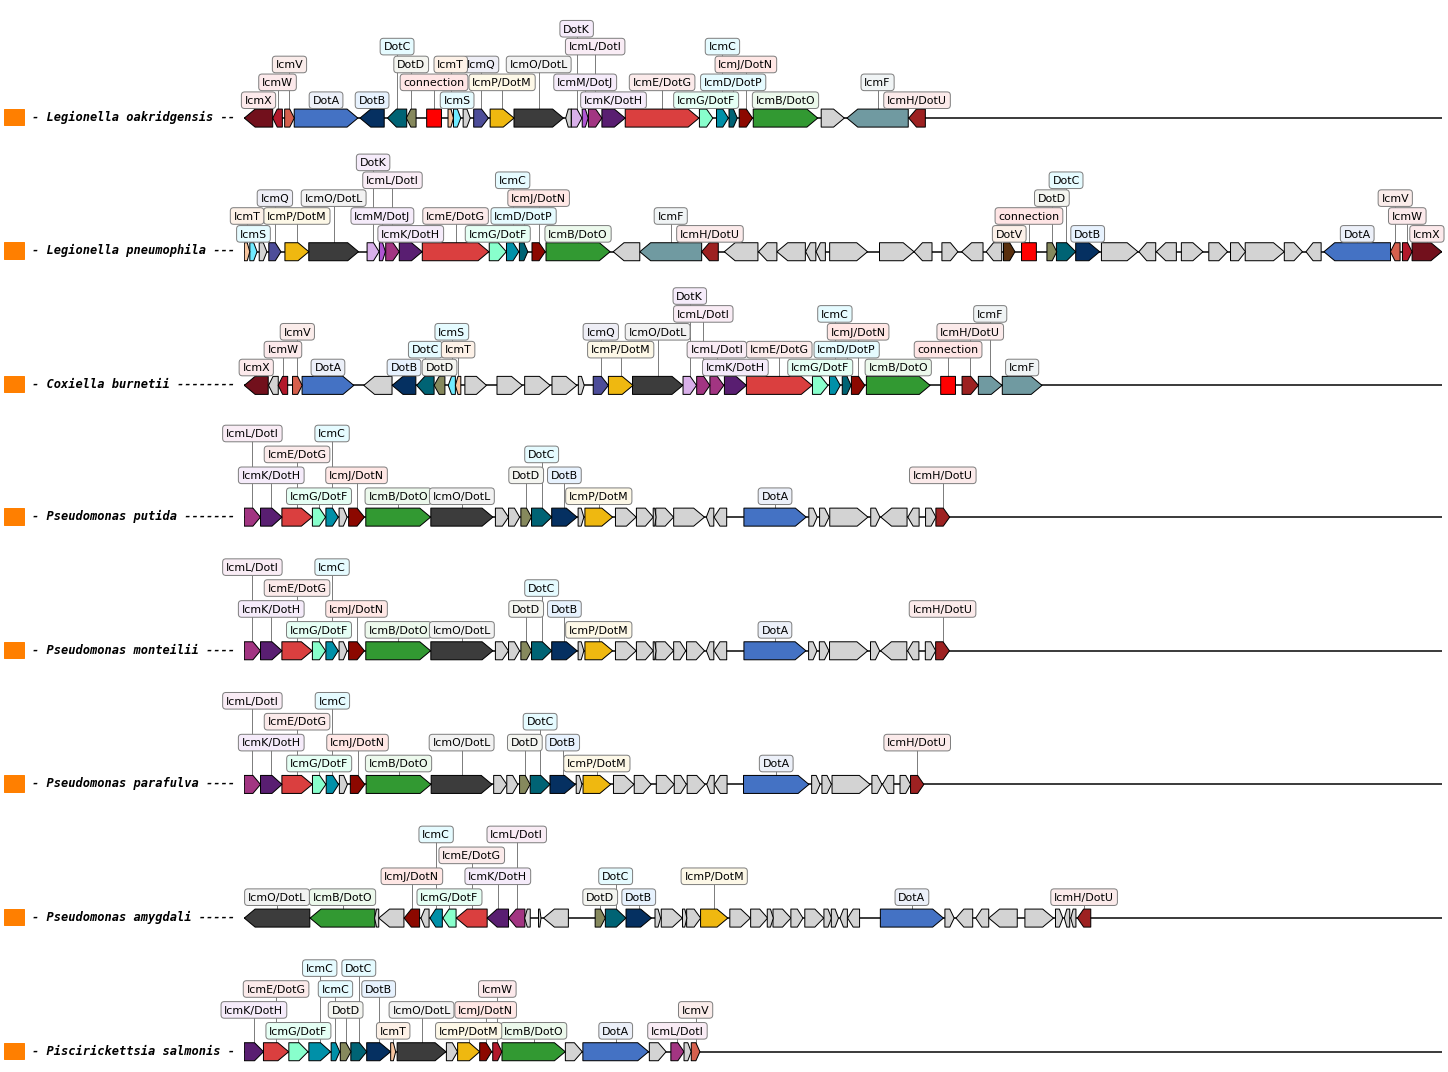

In [30]:
colors_dic = visual_utils.colors_palletes('T4SS')
mmseq = dict(pd.read_table(T4SS_paths.get('all_together_summary'), usecols=['contig', 'mmseq_tax']).values)
systems, operon_lngth_dic = list(), dict()

for contig in contigs_of_intrest:
    matches_to_display = cntg_mtchs_dic.get(contig) # all actual matches ORFs (broguht in full fasta convention).
    matches_to_display = sorted(matches_to_display, key=lambda x:int(x.rsplit('_', 1)[1]))
    
    orf_to_display = cntg_orfs_dic.get(contig) # all orf include '#' and 'connections' (brought in a customized 'pattern' convention)
    orf_to_display = visual_utils.sort_orfs(orf_to_display)

    orfs_to_keep = visual_utils.orfs_to_keep_fill(orf_to_display, offset=0)
    orfs = gff_parser.main(cntg_gff_path_dic.get(contig)).get(contig)
    orfs = list(filter(lambda orf_dict:int(orf_dict.get('id').split('_')[-1].lstrip('0')) in orfs_to_keep, orfs)) # filter gff parser output to the relevant ORFs.
    
    between_orf_dstnc = 0
    start = 0

    for connection_idx in [idx for idx, value in enumerate(orf_to_display) if value == 'connection']:
        orfs.insert(connection_idx, {'id': 'connection', 
                                     'source': None, 
                                     'annotation': None, 
                                     'start': orfs[connection_idx-1].get('end') + 10, 
                                     'end': orfs[connection_idx-1].get('end') + 1010, 
                                     'strand': None}) # add 'connection' element to the matches list, so it will be located later on in the script.

    for idx, _ in enumerate(orfs):
        orf_length = orfs[idx].get('end') - orfs[idx].get('start')
        try:
            if orfs[idx].get('id') == 'connection':
                between_orf_dstnc = 500
            else:
                between_orf_dstnc = orfs[idx+1].get('start') - orfs[idx].get('end')
        except IndexError:
            pass
        orfs[idx]['start'] = start + (300 if orfs[idx].get('id') == 'connection' else 0)
        orfs[idx]['end'] = start + orf_length
        start = orfs[idx]['end'] + between_orf_dstnc

    first_match = matches_to_display[0]
    last_match = matches_to_display[-1]

    diagram_start, diagram_end, offset_inside, inside, out = None, None, False, False, False
    first_offset, last_offset = visual_utils.index_with_offset(orfs, first_match, last_match, offset=0)

    names = list()
    for name in orf_to_display:
        if name in ['#', 'connection']:
            names.append(name)
        elif ('Icm' in name) or ('Dot' in name): # Type IV-B
            names.append(name.split('$')[1].replace('_','/')) 
        else: # Type IV-A
            names.append(re.sub(r'^T_', '', name.split('$')[1]))
            
    contig_orfs_name_gen = (name for name in names)
    features = list()
    
    for orf in orfs:
        if orf.get('id') == first_match:
            offset_inside, inside = True, True
            if not diagram_start:
                diagram_start = orf.get('start')
        if inside:
            name = next(contig_orfs_name_gen).replace('virb4', 'virB4')
            if name == '#':
                lbl = '#'
                col = colors_dic.get(name)
            elif name == 'connection':
                lbl = 'connection'
                col = 'red'
            else:
                lbl = name
                col = colors_dic.get(name)
            if orf.get('id') == last_match:
                inside = False
        else:
            if orf.get('id') == first_offset or offset_inside:
                offset_inside = True
                if not diagram_start:
                    diagram_start = orf.get('start')
                lbl = '#'
                col = colors_dic.get('#')
        if orf.get('id') == last_offset:
            out = True
        if offset_inside:
            features.append(GraphicFeature(start = orf.get('start'),
                                           end = orf.get('end'),
                                           strand = visual_utils.st(orf.get('strand')),
                                           color = col if col else 'white',
                                           label = None if lbl == '#' else lbl,
                                           label_link_color = 'black',
                                           open_left = True if lbl == 'connection' else False,
                                           open_right = True if lbl == 'connection' else False,
                                           thickness = 18))                     
        if out:
            diagram_end = orf.get('end')
            break
    operon_lngth_dic[contig] = diagram_end-diagram_start
    if contig in visual_utils.reversed_contigs():
        for feature in features:
            feature.start = feature.start * (-1)
            feature.end = feature.end * (-1)
            diagram_start = diagram_end * (-1)
    systems.append([contig, features, diagram_start])   
mx = max(operon_lngth_dic.values())

fig, diagrams = plt.subplots(nrows=len(systems), ncols=1, figsize=(20, 15), sharex=False)

for (contig, features, start), diagram, in zip(systems, diagrams):
    print(contig)
    type, phylum, species, = [(a, b, c) for a, b, c in rpr_df[rpr_df.contig == contig].loc[:, ['type', 'phyla_class', 'species']].values][0]

    diagram.annotate(text='  ', xy=(0,0), xytext=(-.198,-.08), xycoords=diagram.get_yaxis_transform(), 
                     bbox=dict(boxstyle='Square', facecolor=box_colors_dic.get(contig), edgecolor=box_colors_dic.get(contig)), 
                     fontsize=11, fontfamily='monospace', fontweight='bold', fontstyle='normal', color='white')# , verticalalignment='center_baseline', horizontalalignment='center')

    diagram.annotate(text=f'- {species} '.ljust(28, '-'), xy=(0,0), xytext=(-.1775,-.08), xycoords=diagram.get_yaxis_transform(), fontsize=12, fontfamily='monospace', fontweight='bold', fontstyle='italic')

    graphic_record = GraphicRecord(sequence_length = mx,
                                   first_index = start,
                                   features = features,
                                   ticks_resolution = 'auto', 
                                   feature_level_height = 0,
                                   labels_spacing = 0)
    graphic_record.determine_annotation_height = lambda _ : .8

    graphic_record.plot(ax = diagram, 
                        draw_line = True, 
                        annotate_inline = False, 
                        with_ruler = False)
plt.tight_layout()
fig.savefig('figure5_c.svg',bbox_inches='tight')
fig